Métricas de evaluación para modelos de clasificación
===

* 5:00 min | Ultima modificación: Junio 22, 2019 | [YouTube]

Accuracy Classification Score
---

Cómputa la cantidad o porcentaje de predicciones correctas.

$$
\text{accuracy}(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n-1} 1(\hat{y}_i=y_i)
$$

con

$$
1_A(x)=
\begin{cases}
    1 & \text{si } x \in A \\
    0 & \text{si } x \notin A 
\end{cases}
$$

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

y_true = [0, 0, 1, 1, 2]
y_pred = [0, 1, 0, 1, 2]

accuracy_score(
    y_true=y_true, 
    y_pred=y_pred,
    normalize=True,
)

0.6

In [2]:
accuracy_score(
    y_true=y_true, 
    y_pred=y_pred,
    normalize=False,
)

3

## Clasificación binario

Para evaluar el desempeño en problemas de clasificación dicotómicos (dos clases mutuamente excluyentes) se usa la matriz de confusión:


             | Pronostico
             |  P     N
    ---------|------------  
          P  |  TP    FN          
    Real     |
          N  |  FP    TN
    
    TP - Verdadero positivo (correcto)
    TN - Verdadero negativo (correcto)
    FN - Falso negativo (mal clasificado)
    FP - Falso positivo (mal clasificado)
    
Esta tabla permite analizar el comportamiento del modelo.

La medición de la precisión del modelo permite estimar el desempeño del modelo ante nuevos datos.

Matriz de confusión
---

Es una matriz donde las filas corresponden a la clase verdader y las columnas a la clase pronósticada, de tal forma, que permite evaluar la precisión para cada clase.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0,
)

clf = SVC(kernel="linear", C=0.01).fit(X_train, y_train)

cm = confusion_matrix(
    y_true=y_train,
    y_pred=clf.predict(X_train),
    #
    # Lista de labels para las filas de la matriz
    labels=None,
    #
    # Normaliza la matriz de confusión sobre las filas ('true'), 
    # las columnas ('pred') o toda la matriz ('all')
    normalize=None,
)

cm

array([[37,  0,  0],
       [ 0, 24, 10],
       [ 0,  1, 40]])

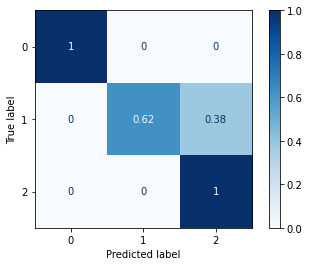

In [6]:
#
# Visualización directa de la matriz de confusión
#
plot_confusion_matrix(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize='true',
)
plt.show()

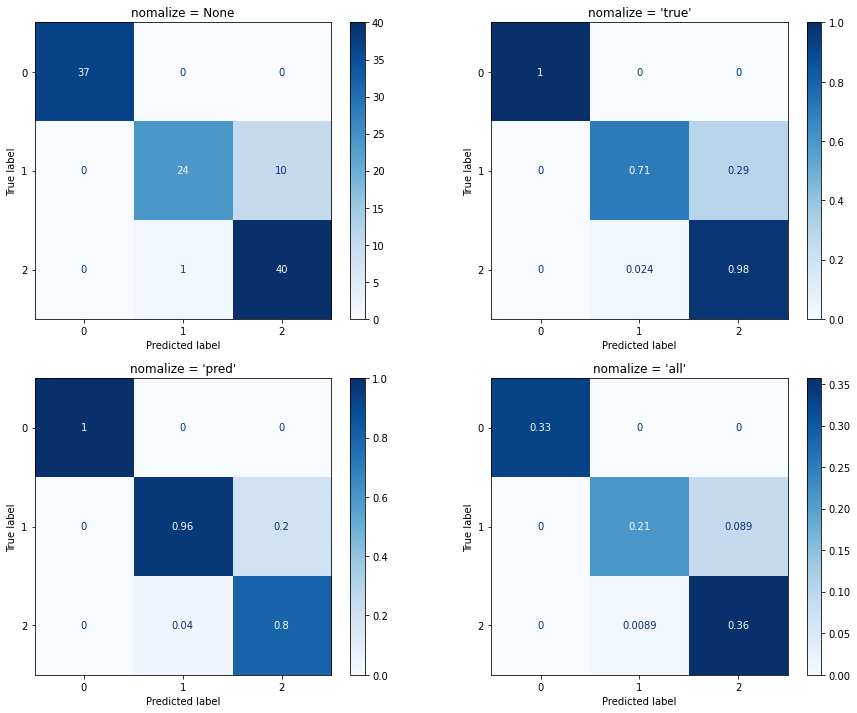

In [7]:
#
# Efectos de la normalización
#
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15, 12))

for i_normalize, normalize in enumerate([None, "true", "pred", "all"]):

    cm = confusion_matrix(
        y_true=y_train,
        y_pred=clf.predict(X_train),
        labels=None,
        normalize=normalize,
    )
    
    ax = plt.subplot(2, 2, i_normalize + 1)
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=clf.classes_,
    )
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.gca().set_title('nomalize = ' + repr(normalize))

